<a href="https://colab.research.google.com/github/Jayveersinh-Raj/ML_In_Sklearn/blob/main/ML_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Downloading and extracting the data to datasets/housing directory
import os
import tarfile
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 os.makedirs(housing_path, exist_ok=True)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()

In [2]:
# Function that uses pandas to extract the csv file
import pandas as pd
def load_data(path = HOUSING_PATH):
 csv = os.path.join(HOUSING_PATH, "housing.csv")
 return pd.read_csv(csv)

In [3]:
fetch_housing_data()
data = load_data()
data.head() # The first 5 data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Notice that the total_bed
rooms attribute has only 20,433 nonnull values, meaning that 207 districts are missing
this feature. We will need to take care of this later.

 When you looked at the top five rows, you
probably noticed that the values in the ocean_proximity column were repetitive,
which means that it is probably a categorical attribute. You can find out what categories exist and how many districts belong to each category by using the
**value_counts()** method

In [5]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Let’s look at the other fields. The **describe()** method shows a summary of the
numerical attributes

In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


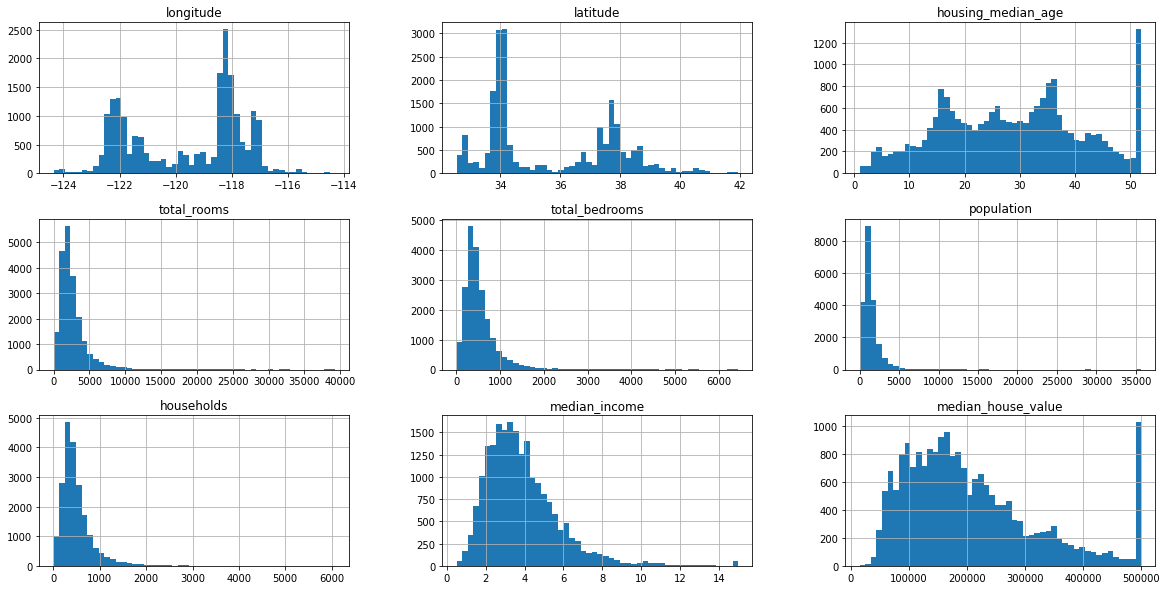

In [7]:
# Lets plot the numeric data as historgrams
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize = (20,10))
plt.show()

In [8]:
# Lets split the test train set using Sklearn.model_selection library
X = data.drop(["median_house_value"], axis = 1) # Since it is a column axis = 1
y = data["median_house_value"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
# Lets see
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND


In [10]:
# Lets see y
y_train.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

🔑 **Note**:
 
When a survey
company decides to call 1,000 people to ask them a few questions, they don’t just pick
1,000 people randomly in a phone book. They try to ensure that these 1,000 people
are representative of the whole population. For example, the US population is 51.3%
females and 48.7% males, so a well-conducted survey in the US would try to maintain
this ratio in the sample: 513 female and 487 male. This is called stratified sampling:
the population is divided into homogeneous subgroups called strata, and the right
number of instances are sampled from each stratum to guarantee that the test set is
representative of the overall population. If the people running the survey used purely
random sampling, there would be about a 12% chance of sampling a skewed test set that was either less than 49% female or more than 54% female. Either way, the survey
results would be significantly biased

**To follow the above**:
1. Train set should be truly representative
2. Test set should also be truly representative



**Back to the problem:**

Suppose you chatted with experts who told you that the median income is a very
important attribute to predict median housing prices. You may want to ensure that
the test set is representative of the various categories of incomes in the whole dataset.


median_income histogram tells us that most median income values are clustered around 1.5 to 6 (i.e.,
$15,000–$60,000), but some median incomes go far beyond 6. It is important to have
a sufficient number of instances in your dataset for each stratum, or else the estimate
of a stratum’s importance may be biased. This means that you should not have too
many strata, and each stratum should be large enough.

**pd.cut():**

use *pd.cut()* function to create an income category attribute with five categories (labeled
from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from
1.5 to 3, and so on:


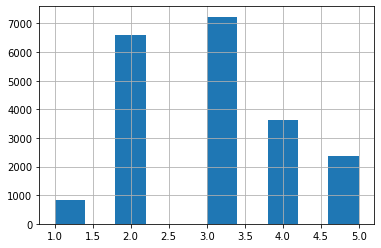

In [14]:
import numpy as np
data["category"] = pd.cut(data["median_income"], 
                          bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels = [1, 2, 3, 4, 5])
data["category"].hist()

**bins:**

A histogram displays numerical data by grouping data into "bins" of equal width. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin. Bins are also sometimes called "intervals", "classes", or "buckets".

# Stratified suffle split 
* usimg Sklearn
* from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,
                               test_size = 0.2,
                               random_state = 42) # 20% test set

for train_i, test_i in split.split(data, data["category"]):
  strat_train = data.loc[train_i]
  strat_test = data.loc[test_i]

In [25]:
# Lets see if it worked
stratified = strat_train["category"].value_counts() / len(strat_train) # will give the propostions
stratified

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: category, dtype: float64

In [27]:
# Lets compare it to the full set
overall = data["category"].value_counts() / len(data)
overall

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: category, dtype: float64

Its almost identical, lets compare visually

In [28]:
# lets see the propostions earlier in the random sampling
X_train["category"] = pd.cut(X_train["median_income"],
                          bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels = [1, 2, 3, 4, 5])
random = X_train["category"].value_counts() / len(X_train)
random

3    0.348595
2    0.317466
4    0.178537
5    0.115673
1    0.039729
Name: category, dtype: float64

3,2,4,5,1 because value.counts() for them are in descending order

**Percentage error:**

pr_err = | $\frac{v_a - v_e}{v_e}$ | $\cdot$ 100 %

where:

pr_err = percentage error

v$_a$ = actual observed value

v$_e$ = expected value



In [40]:
# Function to calculate percentage error
def percentage_error(ob_value, exp_value):
  return abs((ob_value - exp_value) / exp_value) * 100

In [43]:
# % error for stratified
strat_pr_err = percentage_error(stratified, overall)
strat_pr_err

3    0.003455
2    0.003799
4    0.006870
5    0.021169
1    0.091241
Name: category, dtype: float64

In [44]:
# % error for random
rand_pr_err = percentage_error(random, overall)
rand_pr_err

3    0.566611
2    0.433065
4    1.264084
5    1.079594
1    0.243309
Name: category, dtype: float64

In [65]:
table = np.array ([overall, stratified, random, strat_pr_err, rand_pr_err]).T
table = pd.DataFrame(table, 
                     columns = ["Overall", "stratified", "Random",
                                "Strat. %error", "Rand. %error"]) 
table

,Overall,stratified,Random,Strat. %error,Rand. %error
0,0.350581,0.350594,0.348595,0.003455,0.566611
1,0.318847,0.318859,0.317466,0.003799,0.433065
2,0.176308,0.176296,0.178537,0.006870,1.264084
3,0.114438,0.114462,0.115673,0.021169,1.079594
4,0.039826,0.039789,0.039729,0.091241,0.243309


Now that we stratified datasets lets drop the *category* column, since it is of no use now

In [67]:
data = data.drop(["category"], axis = 1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
